In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


#Loading the dataset
data=pd.read_csv('spam_ham_dataset.csv')
df=pd.DataFrame(data)
print(df)



      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [3]:
#pre-processing

#printing details of dataset
print("shape: ",df.shape)
print("columns: ",df.columns)
print(df.info())


shape:  (5171, 4)
columns:  Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
Unnamed: 0    5171 non-null int64
label         5171 non-null object
text          5171 non-null object
label_num     5171 non-null int64
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


In [4]:
#droping the unwanted columns and checking for unknown columns

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
print("shape: ",df.shape)

label        0
text         0
label_num    0
dtype: int64
shape:  (4993, 3)


In [5]:
#removing the stopwords and unecessesary punctuation
nltk.download('stopwords')
def process_text(text):
    #remove punctuation
    #remove stopwords
    #return a list of clean text words
    
    rmpunc=[ch for ch in text if ch not in string.punctuation]
    rmpunc=''.join(rmpunc)
    
    clean_text=[word for word in rmpunc.split() if word.lower() not in stopwords.words('english')]
    return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
mail_text=np.array(df['text'])
for i in range(len(mail_text)):
    mail_text[i]=process_text(mail_text[i])
    mail_text[i]=' '.join(mail_text[i])
df['text']=mail_text
# Replace email addresses with 'email'
df['text'] = df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['text'] = df['text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?', 'numbr')
print(df['text'])

0       Subject enron methanol meter numbr follow note...
1       Subject hpl nom january numbr numbr see attach...
2       Subject neon retreat ho ho ho around wonderful...
3       Subject photoshop windows office cheap main tr...
4       Subject indian springs deal book teco pvr reve...
                              ...                        
5165    Subject fw crosstex energy driscoll ranch numb...
5166    Subject put numbr ft transport volumes decreas...
5167    Subject numbr numbr numbr following noms hpl t...
5169    Subject industrial worksheets august numbr act...
5170    Subject important online banking alert dear va...
Name: text, Length: 4993, dtype: object


In [7]:
#splitting the data into training and testing
x=df['text']
y=df['label_num']
x_train,x_test,y_train,y_test=train_test_split=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

xtrain=tfidf.fit_transform(x_train)
xtest=tfidf.transform(x_test)

#print(vec1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(xtrain)
print(y_train)

(3495,)
(3495,)
(1498,)
(1498,)
  (0, 36193)	0.4721146037452122
  (0, 16243)	0.7047742144200552
  (0, 12987)	0.23053268102500607
  (0, 2347)	0.19619943644908852
  (0, 23254)	0.3180600079843963
  (0, 23028)	0.22541103492994208
  (0, 16238)	0.17847776057599615
  (0, 31494)	0.07024925172650567
  (1, 8666)	0.3197218722647241
  (1, 14063)	0.21364575741228609
  (1, 32138)	0.35385384835443195
  (1, 32293)	0.3412169084715892
  (1, 23455)	0.3544487611542189
  (1, 373)	0.33626372631182255
  (1, 11638)	0.19098426037499994
  (1, 23254)	0.38113190731041574
  (1, 16238)	0.4277404740815972
  (1, 31494)	0.08417981080779618
  (2, 32945)	0.08792224906700573
  (2, 30165)	0.11079308482529407
  (2, 34621)	0.12409841751816658
  (2, 36079)	0.13660677829874374
  (2, 34374)	0.20310119503026375
  (2, 34651)	0.1528993747845943
  (2, 5460)	0.14967844988008958
  :	:
  (3494, 13950)	0.09379383842988516
  (3494, 20173)	0.09581218449326255
  (3494, 26068)	0.11632641067112535
  (3494, 5936)	0.09379383842988516
  (3494

In [9]:
#Logistic regression model for classification
logit = LogisticRegression(random_state = 0)
logit.fit(xtrain, y_train)
y_pred = logit.predict(xtest)
print(y_pred)

[0 0 0 ... 1 0 0]


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix: \n',cm)

Accuracy: 0.9686248331108144
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1089
           1       0.94      0.95      0.94       409

    accuracy                           0.97      1498
   macro avg       0.96      0.96      0.96      1498
weighted avg       0.97      0.97      0.97      1498

confusion matrix: 
 [[1062   27]
 [  20  389]]


In [11]:
email=input("enter subjectof your mail: ")

enter subjectof your mail: k


In [12]:
print(type(email))
vec=tfidf.transform([email])
pred = logit.predict(vec)

<class 'str'>


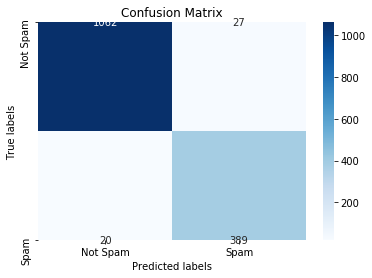

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

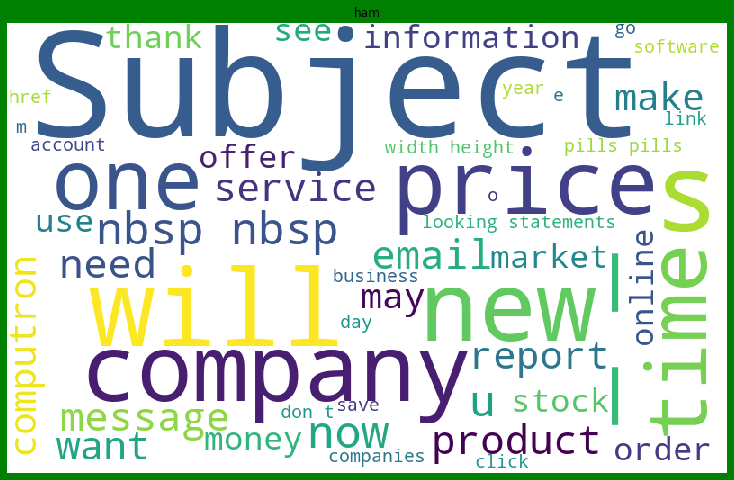

In [14]:
#Getting sense of loud words in ham
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spams = data['text'][data['label_num']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("ham")
plt.show()

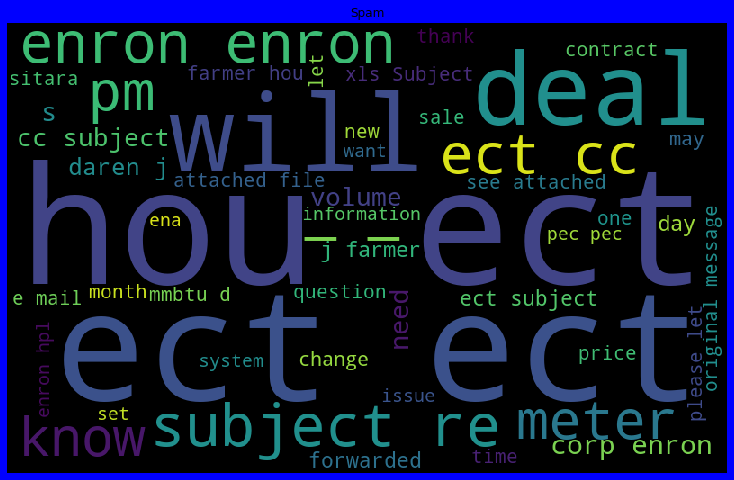

In [15]:
#Getting sense of loud words in spam
spams = data['text'][data['label_num']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='black',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Spam")
plt.show()

In [16]:
#using SVM-it gives accuracy 74%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

spam = pd.read_csv('spam_ham_dataset.csv')
z = spam['text']
y = spam["label_num"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

cv = CountVectorizer()
features = cv.fit_transform(z_train)

model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(z_test)
print(model.score(features_test,y_test))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7275362318840579
